

---

---
## Previsão de vendas por meio de anúncios de publicidade

Este notebook implementa uma rede neural para estimar (prever) o aumento ou diminuição nas vendas com base nas modalidades de anúncios (propagandas), e compara o seu resultado com a Regressão Linear do Sklearn.

Trata-se de um problema de regressão.

---

---





## Conjunto de dados

Fonte:
- https://statlearning.com/Advertising.csv
- https://statlearning.com/data.html

O conjunto de dados exibe as vendas, em milhares de unidades, em função dos orçamentos de TV, rádio e jornais, em milhares de dólares, para 200 mercados diferentes. 

- Número de Instâncias: 200

- Número de Atributos: 3 atributos numéricos e o target

- Informações dos Atributos:
  - TV
  - Rádio
  - Jornais (newspaper)
  Obs: orçamentos em milhares de dólares
  
- Informação da variável de destino: sales (vendas) em milhares de unidades. 

## Leitura e preparação dos dados

Leitura do arquivo 'Advertising.csv' utilizando os pandas.

In [1]:
import pandas as pd

# Clone do repositório de dados do GitHub
!git clone https://github.com/malegopc/DSBD
# Leitura dos dados do arquivo .csv como dataframe 
advertis = pd.read_csv("/content/DSBD/Datasets/Advertising/Advertising.csv")
# Mostra as 5 primeiras e 5 últimas linhas
advertis

Cloning into 'DSBD'...
remote: Enumerating objects: 541, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 541 (delta 36), reused 71 (delta 28), pack-reused 457
Receiving objects: 100% (541/541), 9.75 MiB | 9.53 MiB/s, done.
Resolving deltas: 100% (244/244), done.


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## Análise prévia dos dados

Imprime o número de dados non-null (não ausentes) e o tipo de cada atributo.

In [2]:
# Mostra o número de dados non-null (não ausentes) e o tipo de cada atributo
print('Informações sobre os dados:\n')
advertis.info()
# Soma o número de dados null (ausentes)
print('\n\nSoma de dados null (vazios):\n')
advertis.isnull().sum()

Informações sobre os dados:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Soma de dados null (vazios):



Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

## Eliminação de dados desnecessários


In [3]:
# Elimina primeira coluna
advertis.drop(advertis.columns[[0]], axis=1, inplace=True)
advertis

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Análise (estatística) descritiva dos dados

Análise descritiva dos dados (resumo).

In [4]:
advertis.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Mostra um histograma das vendas

O objetivo é comparar com as predições do modelo de rede neural e com o método de regressão linear.

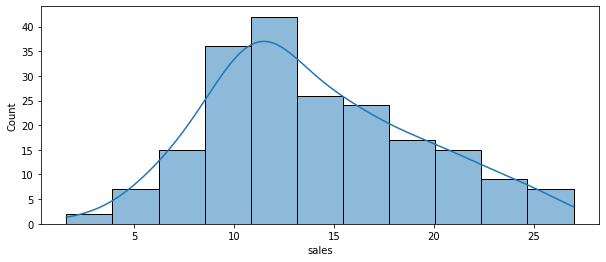

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.histplot(advertis['sales'], kde = True)

## Calcula a correlação entre pares de atributos (colunas)

In [6]:
# Correlação entre TV e vendas
print('Correlação entre TV e vendas (sales): ',advertis['TV'].corr(advertis['sales']))
# Correlação entre Radio e vendas
print('Correlação entre radio e vendas (sales): ',advertis['radio'].corr(advertis['sales']))
# Correlação entre jornais e vendas
print('Correlação entre jornais e vendas (sales): ',advertis['newspaper'].corr(advertis['sales']))

Correlação entre TV e vendas (sales):  0.7822244248616061
Correlação entre radio e vendas (sales):  0.5762225745710551
Correlação entre jornais e vendas (sales):  0.22829902637616528


# Separa atributos e variável de destino

Separa atributos (em X) e variável de destino (em y).

In [7]:
# Separa os atributos da variável de destino (median_house_value)
X = advertis.drop('sales',axis=1).values
y = advertis['sales'].values
print(X.shape)
print(y.shape)

(200, 3)
(200,)


## Divide o conjunto de dados em treino e teste

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## Normaliza (padroniza) os dados

Transforma os atributos redimensionando para o intervalo [0,1]

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

## Cria o modelo de rede neural

In [10]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
# Uma camada escondida com 20 neurônios
model.add(Dense(20, input_dim=X_train.shape[1], activation ="relu"))
# Camada de saída
model.add(Dense(1)) # default: função de ativação linear
# Sumário do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                80        
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


## Compila a rede neural

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

## Treina a rede neural

In [12]:
history = model.fit(X_train, y_train, epochs=300, batch_size = 5, validation_data=(X_test, y_test))

Epoch 1/300
30/30 [==============================] - 3s 7ms/step - loss: 228.9789 - mean_squared_error: 228.9789 - val_loss: 195.4355 - val_mean_squared_error: 195.4355
Epoch 2/300
30/30 [==============================] - 0s 3ms/step - loss: 221.7046 - mean_squared_error: 221.7046 - val_loss: 188.7356 - val_mean_squared_error: 188.7356
Epoch 3/300
30/30 [==============================] - 0s 3ms/step - loss: 213.2863 - mean_squared_error: 213.2863 - val_loss: 180.2577 - val_mean_squared_error: 180.2578
Epoch 4/300
30/30 [==============================] - 0s 3ms/step - loss: 202.6373 - mean_squared_error: 202.6373 - val_loss: 169.6713 - val_mean_squared_error: 169.6713
Epoch 5/300
30/30 [==============================] - 0s 3ms/step - loss: 189.5264 - mean_squared_error: 189.5264 - val_loss: 156.4369 - val_mean_squared_error: 156.4369
Epoch 6/300
30/30 [==============================] - 0s 3ms/step - loss: 173.5719 - mean_squared_error: 173.5719 - val_loss: 141.8551 - val_mean_squared_er

In [13]:
mse_test = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.3403 - mean_squared_error: 0.3403


## Análise da função *loss* (erro/perda)
Vamos observar o comportamento da função *loss* para os dados de treino e de validação/teste.

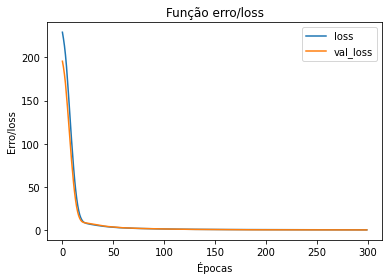

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '')
plt.xlabel("Épocas")
plt.ylabel('Erro/loss')
plt.title('Função erro/loss')
plt.legend(['loss', 'val_loss'])
plt.show()

## Análise da métrica de desempenho (acurácia)
Vamos observar o desempenho (acurácia) da rede para os dados de treino e de validação/teste.

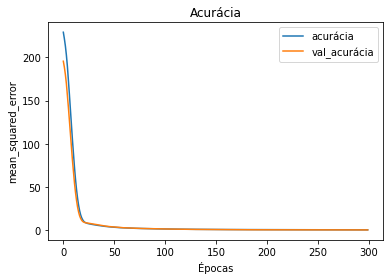

In [15]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'], '')
plt.xlabel("Épocas")
plt.ylabel('mean_squared_error')
plt.title('Acurácia')
plt.legend(['acurácia', 'val_acurácia'])
plt.show()

## Fazendo predições

In [16]:
import numpy as np

predictions = model.predict(X_test)
# 5 primeiros casos do conjunto teste
for i in range(5):
  print('%s => %f (esperado %f)' % (np.round(X_test[i],2).tolist(), predictions[i], y_test[i]))

[0.55, 0.64, 0.52] => 17.515915 (esperado 16.900000)
[0.66, 0.96, 0.52] => 22.035004 (esperado 22.400000)
[0.99, 0.57, 0.43] => 20.664419 (esperado 21.400000)
[0.04, 0.74, 0.45] => 7.427867 (esperado 7.300000)
[0.74, 0.99, 0.03] => 23.233824 (esperado 24.700000)


## Mostra histograma das predições do modelo neural

Mostra histograma das predições de vendas para o conjunto de dados completo com o objetico de comparar com o histograma das vendas real.

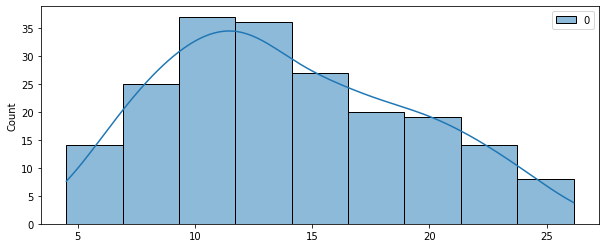

In [17]:
# Normaliza o conjunto X de dados
X_scaled = scaler.transform(X)
# Aplica o modelo
prediction = model.predict(X_scaled)
# plota histograma
plt.figure(figsize=(10,4))
sns.histplot(prediction, kde = True)

## Regressão Linear (Sklearn)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

reglin = LinearRegression()
reglin.fit(X_train,y_train)

LinearRegression()

## Aplica o modelo de regressão linear no conjunto teste

In [19]:
y_reglin = reglin.predict(X_test)

## Calcula o erro quadrático médio

In [20]:
print(metrics.mean_squared_error(y_reglin,y_test))

2.8800237300941918


## Fazendo predições

In [21]:
predictions_reg = reglin.predict(X_test)
# 5 primeiros casos do conjunto teste
for i in range(5):
  print('%s => %f (esperado %f)' % (np.round(X_test[i],2).tolist(), predictions_reg[i], y_test[i]))

[0.55, 0.64, 0.52] => 16.383482 (esperado 16.900000)
[0.66, 0.96, 0.52] => 20.924350 (esperado 22.400000)
[0.99, 0.57, 0.43] => 21.614954 (esperado 21.400000)
[0.04, 0.74, 0.45] => 10.490700 (esperado 7.300000)
[0.74, 0.99, 0.03] => 22.176905 (esperado 24.700000)


## Mostra histograma das predições da Regressão Linear

Mostra histograma das predições de vendas para o conjunto de dados completo com o objetico de comparar com o histograma das vendas real.

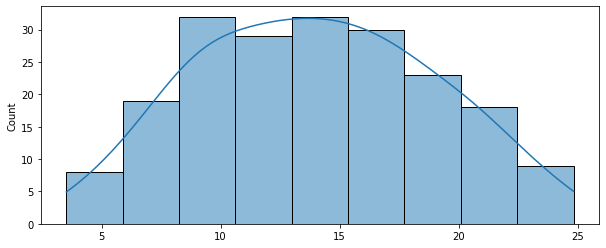

In [22]:
X_scaled = scaler.transform(X)
predictions_reg2 = reglin.predict(X_scaled)
plt.figure(figsize=(10,4))
sns.histplot(predictions_reg2, kde = True)